In [2]:
%pip install -U scikit-learn
%pip install numpy
%pip install matplotlib
%pip install pandas 
%pip install seaborn


  Using cached scikit_learn-1.2.0-cp310-cp310-win_amd64.whl (8.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     ---------------------------------------- 42.5/42.5 MB 3.7 MB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

x shape : (100, 2)
y shape : (100, 1)


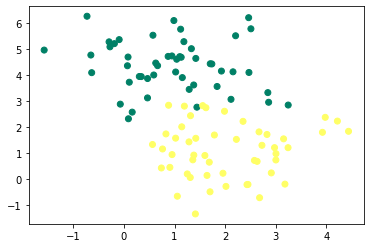

In [4]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)

print(f"x shape : {X.shape}")
print(f"y shape : {y.shape}")

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer")
plt.show()

In [5]:
#initializing the weights and biais
def initialize(X): 
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [6]:
W, b = initialize(X)

In [69]:
W.shape

(2, 1)

In [8]:
b.shape

(1,)

In [14]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1/(1 + np.exp(-Z))
    return A

In [15]:
A = model(X, W, b)
A.shape

(100, 1)

In [35]:
def log_loss(A, y):
    return -1/y.shape[0] * np.sum(y*np.log(A) + (1-y)*np.log(1-A))

In [36]:
log_loss(A, y)

4.640232092207223

In [37]:
def gradients(A, X, y):
    dW = 1/y.shape[0] * np.dot(X.T, A - y)
    db = 1/y.shape[0] * np.sum(A - y)
    return (dW, db)

In [38]:
dW, db = gradients(A, X, y)
dW.shape

(2, 1)

In [40]:
db

0.4489416231514931

In [41]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate*dW
    b = b - learning_rate*db
    return (W, b)

In [43]:
dW, b = update(dW, db, W, b, 0.1)

In [44]:
dW.shape

(2, 1)

In [46]:
b.shape

(1,)

In [66]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A)
    return A >= 0.5

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
def artificial_neuron(X, y, learning_rate=0.1, n_iter=100):
    #initialize W, b
    W, b = initialize(X)
    
    Loss = []
    
    #learning loop
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        
    #Predicting new values
    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))
        
    #Plot evolution of our Loss
    plt.plot(Loss)
    plt.show()
    
    return (W, b)

0.89


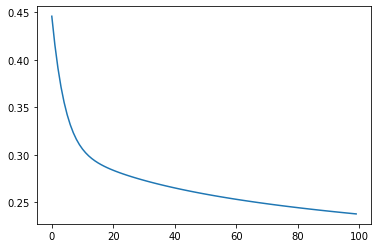

In [63]:
W, b = artificial_neuron(X, y)

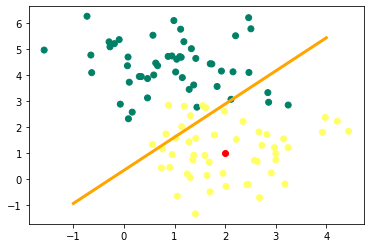

[0.88269511]


array([ True])

In [71]:
new_plant = np.array([2, 1])

#decision line
x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b) / W[1]
plt.plot(x0, x1, c='orange', lw=3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer")
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.show()

predict(new_plant, W, b)